In [18]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import scipy



**Task 1: Probability**


**A: Plot the probability density function $p(x)$ of a one dimensional Gaussian distribution $N (x; 1, 1)$.**

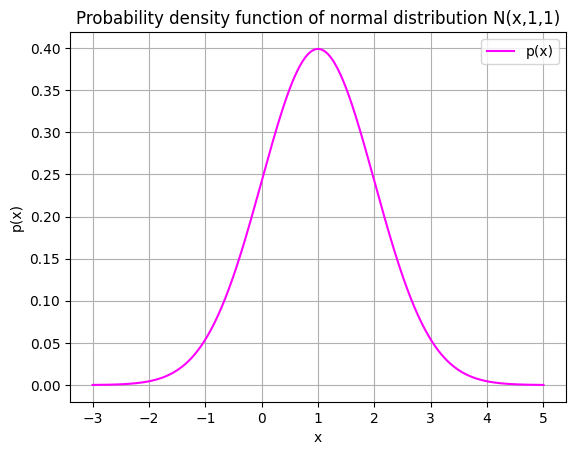

In [19]:
# Distribution N(x,1,1)
y, z = 1, 1
x = np.linspace(-3,5,500)

def normal_distribution(z, x, t):
    norm_distribution = norm.pdf(z, x, t)
    
    return norm_distribution

plt.plot(x, normal_distribution(x,y,z), color = 'magenta', label = 'p(x)')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.title('Probability density function of normal distribution N(x,1,1)')
plt.legend(loc = 'upper right')
plt.show()

**B: Calculate the probability mass that the random variable $X$ is less than 0, that is, $Pr${$X<=0$}.**

In [20]:
def probability_mass(n, x, t):
    prob_mass = norm.cdf(n, x, t)
    
    return prob_mass

print('The probability =', probability_mass(0, y,z))

The probability = 0.15865525393145707


**C: Consider the new observation variable $z$, it gives information about the variable x by the likelihood function $p(z|x) = N(z; x; $\sigma^2$)$, with variance $\sigma^2$ = 0,2. Apply the Bayes’ theorem to derive the posterior distribution, $p(x|z)$, given an observation $z = 0,75$ and plot it. For a better comparison, plot the prior distribution, $p(x)$, too.**


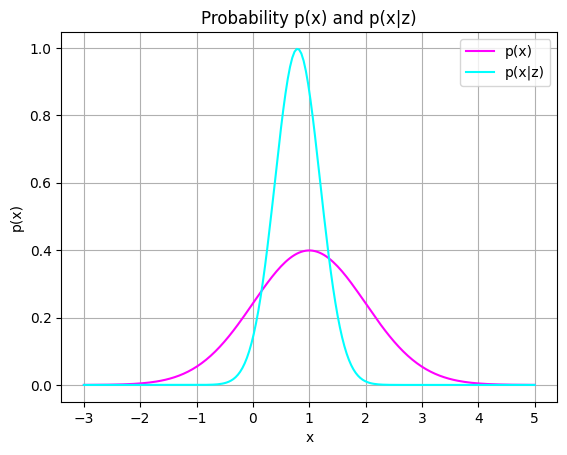

In [21]:
#prob N(x,1,1)
x = np.linspace(-3,5,200)
z = 0.75
sigma = 0.2

prob_x= normal_distribution(x, 1, 1)

prob_x_z = normal_distribution(x, (z + sigma)/( 1 +sigma), sigma / 1 + sigma)
# prior_cdf = norm.cdf(numerical_pdf) - norm.cdf(-numerical_pdf)
# a = norm.pdf(0.75, x, 0.2)

plt.plot(x, prob_x, color = 'magenta', label = 'p(x)')
plt.plot(x, prob_x_z, color = 'cyan', label = 'p(x|z)')
plt.grid(True)
plt.legend()
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Probability p(x) and p(x|z)')
plt.show()

**Task 2: Multivariate Gaussian**

**A: Write the function $plot2dcov$ which plots the 2d contour given three core parameters: mean,covariance, and the iso-contour value $k$. You may add any other parameter such as color, number of points,etc. Then, use $plot2dcov$ to draw the iso-contours corresponding to 1,2,3-sigma of the following Gaussian distributions:**
*$N = (\begin{bmatrix} 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 1 & 0 \\ 0 & 2 \end{bmatrix}), N = (\begin{bmatrix} 5 \\ 0 \end{bmatrix}, \begin{bmatrix} 3 & -0.4 \\ -0,3 & 2 \end{bmatrix}), N = (\begin{bmatrix} 2 \\ 2 \end{bmatrix}, \begin{bmatrix} 9.1 & 6 \\ 6 & 4 \end{bmatrix})$*




In [22]:
def plot2dcov(mean, cov, k):
    color = ['magenta', 'cyan', 'blue']
    A = np.linalg.cholesky(cov)
    t = np.linspace(0, 2 * np.pi, 50)
    
    if k == 'full value':
        for i in range(3):
            x = (i + 1) * np.cos(t)
            y = (i + 1) * np.sin(t)
            coord = A @ np.array([x,y])
            coord[0]  +=  mean[0]
            coord[1] += mean[1]
            graf = plt.plot(coord[0], coord[1], color = color[i], label = 'k =' + str(i + 1))
            plt.grid(True)
            plt.legend(loc = 'upper right')
            plt.xlabel('X')
            plt.ylabel('Y')

    else:
        x = k * np.cos(t)
        y = k  * np.sin(t)
        coord = A @ np.array([x,y])
        coord[0]  +=  mean[0]
        coord[1] += mean[1]
        graf = [coord[0], coord[1]]
        plt.grid(True)
        plt.legend()
        plt.xlabel('X')
        plt.ylabel('Y')


    return graf

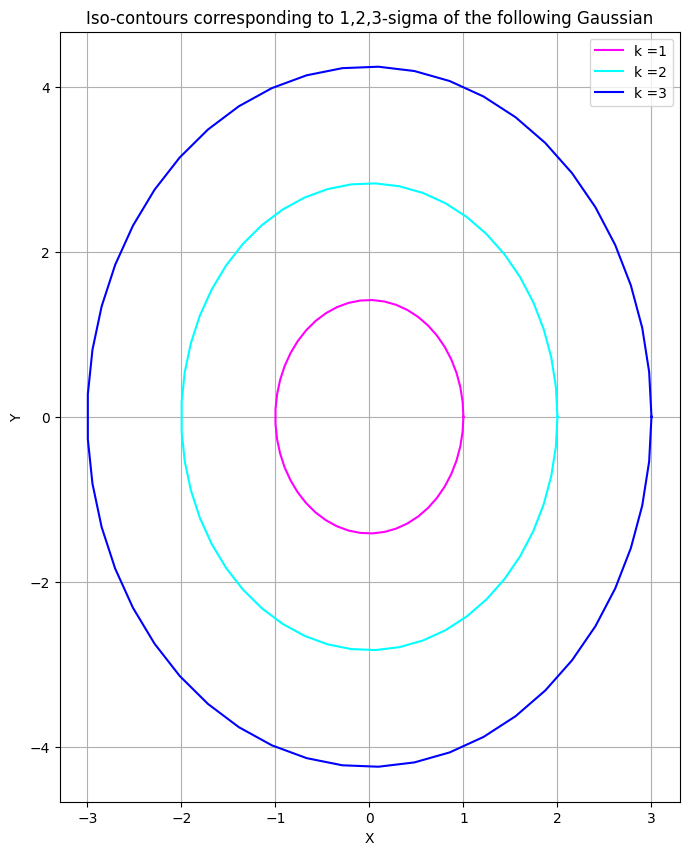

In [27]:
mean = np.array([0, 0])
cov = np.array(([1,0], [0,2]))
plt.figure( figsize=(8,10) )
plot2dcov(mean, cov, 'full value')
plt.title('Iso-contours corresponding to 1,2,3-sigma of the following Gaussian')
plt.show()

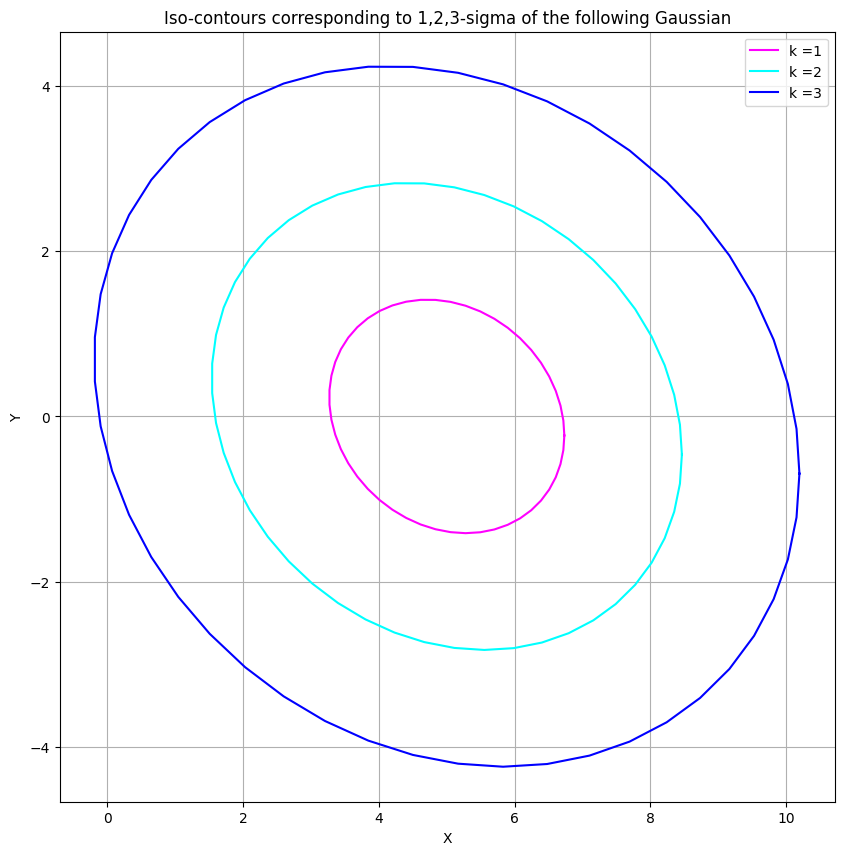

In [24]:
mean = np.array([5, 0])
cov = np.array(([3, -0.4], [-0.4, 2]))
plt.figure(figsize=[10, 10])
plt.title('Iso-contours corresponding to 1,2,3-sigma of the following Gaussian')
plot2dcov(mean, cov, 'full value')
plt.show()


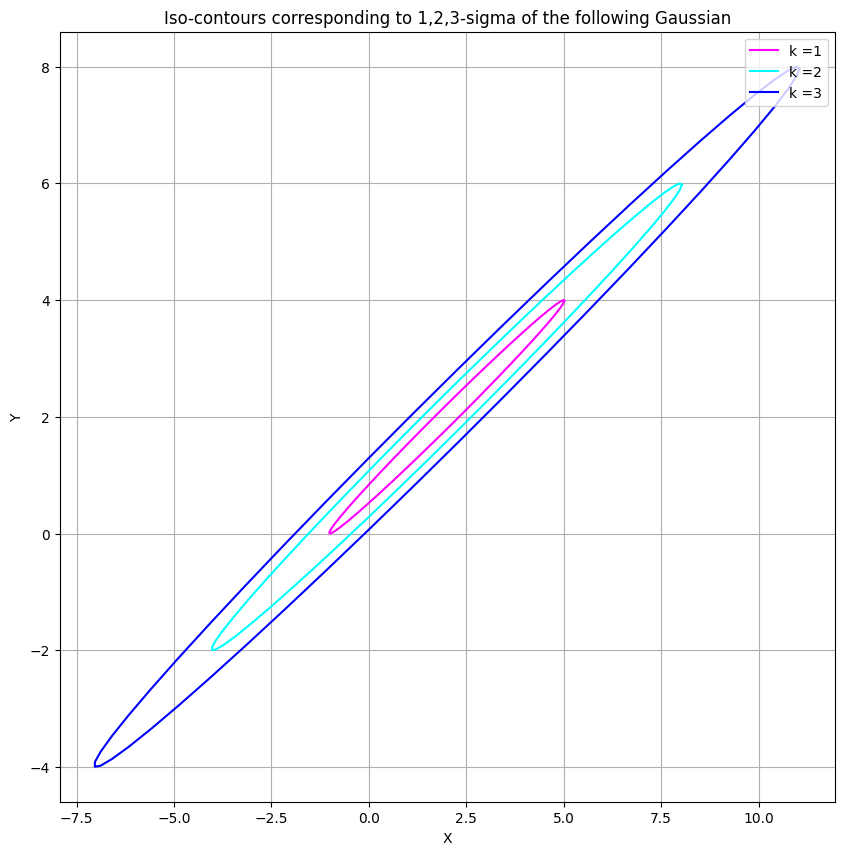

In [25]:
mean = np.array((2, 2))
cov = np.array(((9.1, 6), (6, 4)))
plt.figure(figsize=[10, 10])
plt.title('Iso-contours corresponding to 1,2,3-sigma of the following Gaussian')
plot2dcov(mean, cov, 'full value')
plt.show()

**B. Write the equation of sample mean and sample covariance of a set of points {xi}, in vector form  as was shown during the lecture. You can provide your solution by using Markdown, latex, by hand, etc.**


In [26]:
def sample(mean, cov, t):
    x = np.random.randn(2, t)
    b = np.copy(mean)
    A =  np.linalg.cholesky(cov)
    y = np.array([A @ x[:, i] + b for i in range(t)])
    
    return y

**C.  Draw random samples from a multivariate normal distribution. You can use the python function that draws samples from the univariate normal distribution N (0, 1). In particular, draw and plot 200 samples from**
*$N = (\begin{bmatrix} 2 \\ 2 \end{bmatrix}, \begin{bmatrix} 1 & 1.3 \\ 1.3 & 1 \end{bmatrix})$*
**given distribution; also plot their corresponding 1-sigma iso-contour. Then calculate the sample mean and covariance in vector form and plot again the 1-sigma iso-contour for the estimated Gaussian parameters. Run the experiment multiple times and try different number of samples. Comment on the results.**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


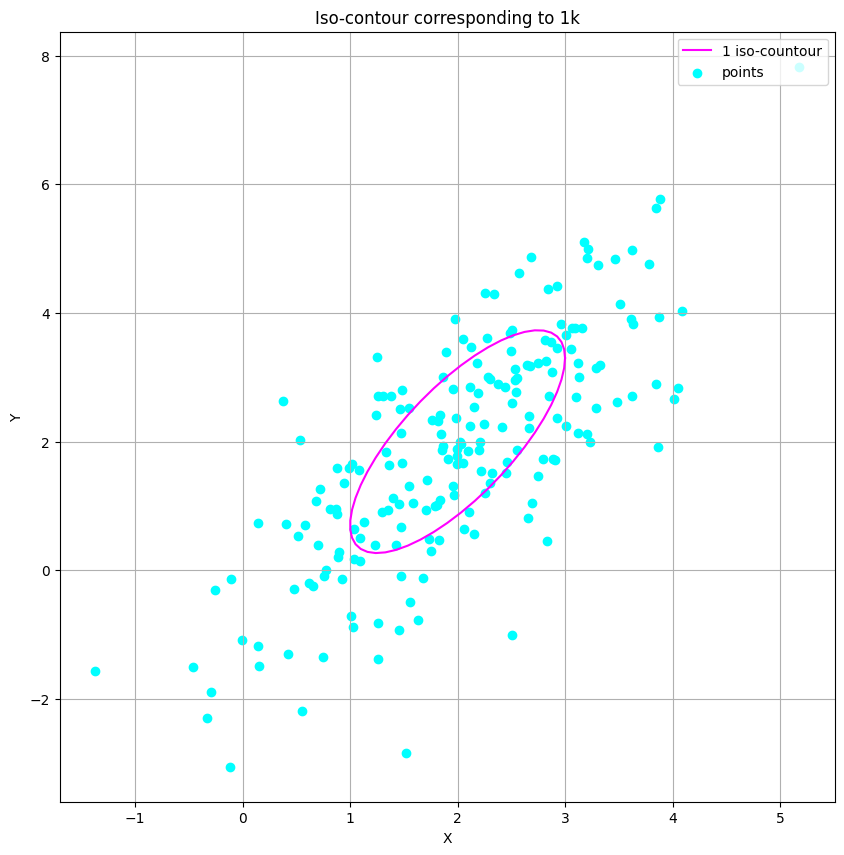

In [60]:
mean = np.array([2, 2])
cov = np.array(([1, 1.3], [1.3, 3]))

y = sample(mean,cov, 200)
plt.figure(figsize=[10, 10])
plt.title('Iso-contour corresponding to 1k')
graf = plot2dcov(mean, cov, 1)
plt.plot(graf[0], graf[1], color = 'magenta', label = '1 iso-countour' )
plt.scatter(y[:, 0], y[:, 1], color = 'cyan', label = 'points')
plt.legend(loc='upper right')
plt.show()

In [61]:
def random_samples(num):

    mean = np.array([(sum(num[:,0])/ len(num[:,0])), (sum(num[:, 1])/len(num[:,1]))])

    sigma_a = sum((num[:, 0] - mean[0]) ** 2) / len(num[:, 0] - 1)
    sigma_b = sum((num[:, 1] - mean[1]) ** 2) / len(num[:, 1] - 1)
    sigma_a_b =sum((num[:, 0] - mean[0]) * (num[:, 1] - mean[1]) / len(num[:,0]))
    cov = np.array(([sigma_a,sigma_a_b], [sigma_a_b, sigma_b]))

    return mean, cov

sample_mean, sample_cov = random_samples(y)

print(sample_mean)
print(sample_cov)


[1.99507442 1.86948292]
[[1.1222892  1.41928893]
 [1.41928893 3.09018875]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


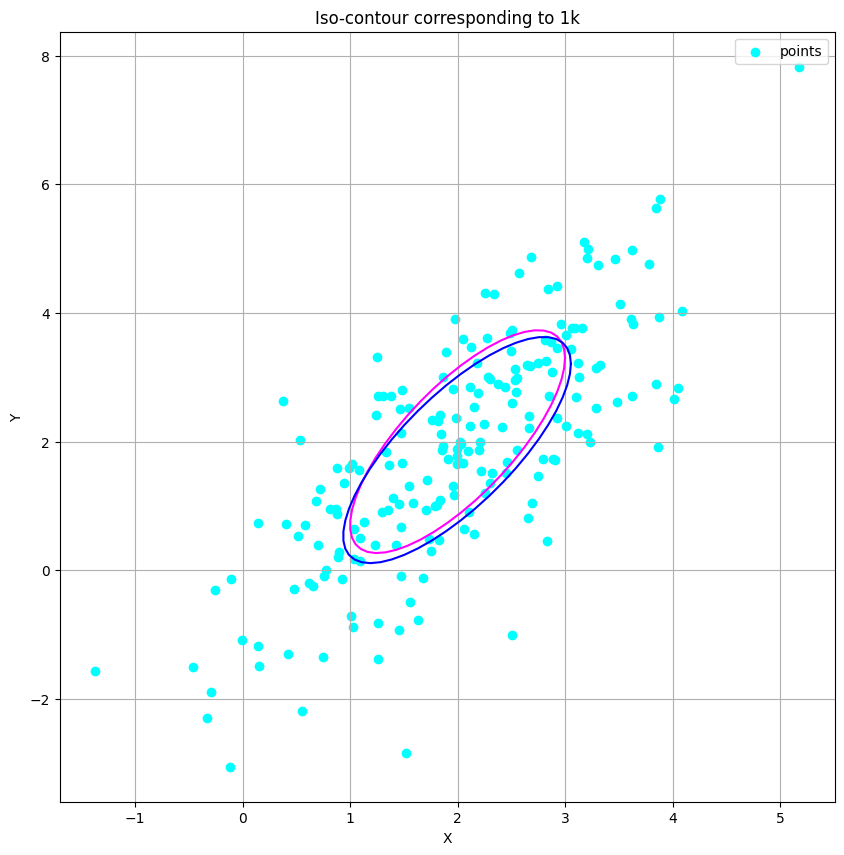

In [62]:

plt.figure(figsize=[10, 10])
graf = plot2dcov(mean, cov, 1)
plt.plot(graf[0], graf[1], color = 'magenta' )
plt.scatter(y[:, 0], y[:, 1], color = 'cyan', label = 'points')
graf1 = plot2dcov(sample_mean, sample_cov, 1)
plt.plot(graf1[0], graf1[1], color = 'blue' )
plt.title('Iso-contour corresponding to 1k')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[1.9482928  1.96199276] [[1.033944   1.42507291]
 [1.42507291 3.26724872]]


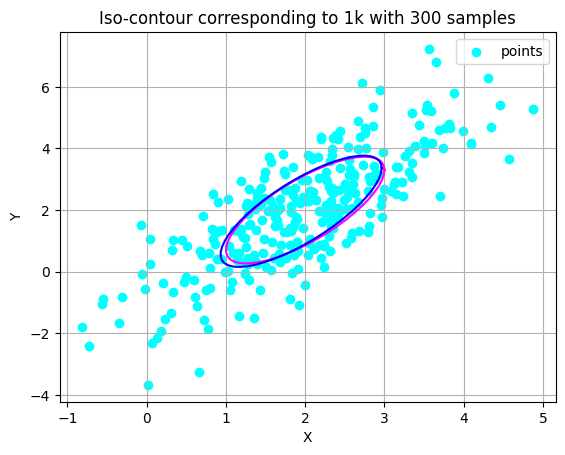

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[1.97872378 2.01254575] [[0.97072778 1.25180088]
 [1.25180088 3.13834911]]


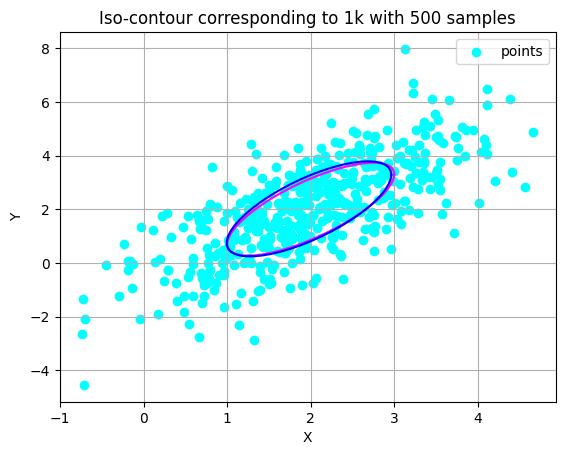

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[2.00758326 1.95881907] [[1.00642752 1.30846989]
 [1.30846989 3.0042526 ]]


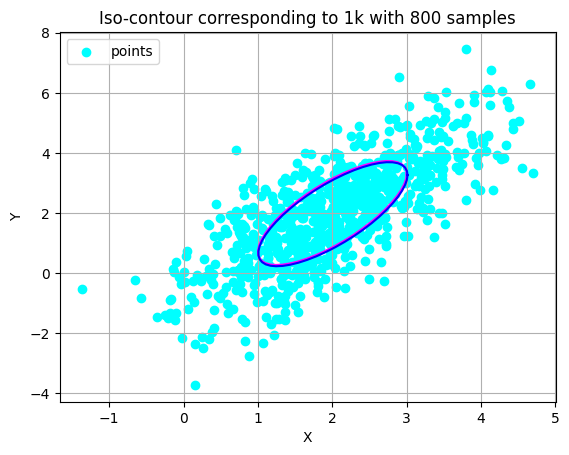

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[1.94358403 1.92593219] [[1.02072505 1.29339941]
 [1.29339941 2.92186498]]


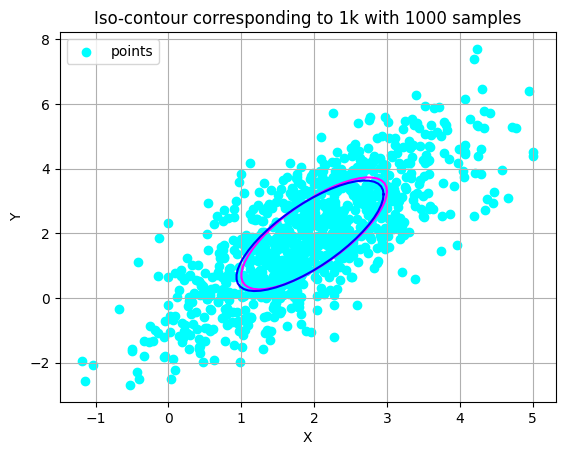

In [63]:
sump = [300, 500, 800, 1000]
for i in range (len(sump)):
        y1 = sample(mean, cov, sump[i])
        sample_mean, sample_cov = random_samples(y1)
        
        print(sample_mean, sample_cov, end = '\n')
 
        graf = plot2dcov(mean, cov, 1)
        plt.plot(graf[0], graf[1], color = 'magenta' )
        plt.scatter(y1[:, 0], y1[:, 1], color = 'cyan', label = 'points')
        graf1 = plot2dcov(sample_mean, sample_cov, 1)
        plt.plot(graf1[0], graf1[1], color = 'blue' )
        plt.title('Iso-contour corresponding to 1k with ' + str(sump[i])+ ' samples')
        plt.legend()
        plt.show()

**Conclusion: The more samples we have, the more accurate our results so the amount of samples the more accurate results we can obtain regarding the distribution parameters.**

**Task 3: Covariance Propagation**

**A: Write the equations corresponding to the mean and covariance after a single propagation of the holonomic platform.**

**$A = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}, B = \Delta_t\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}, R = \Sigma_{\eta_t}$**

**$\mu_t = A\mu_{t-1} + Bu_t$**

**$\Sigma_t = A\Sigma_{t-1}A^T + R$**

**B: How can we use this result iteratively?**


We can use this result iteratively for finding the state PDF and it is moving at a given time

In [230]:
dt = 0.5

A = np. array([[1, 0], 
      [0, 1]])

B = np.array([[dt, 0], 
      [0, dt]])

mean = np.array([0,0])
cov = np.array([[0.1, 0],
                 [0, 0.1]])

u = np.array([3, 0])


def propagation_holon(A, B, mean, cov, u):
    mean_p = []
    cov_p = []
    
    mean_p.append(mean)
    cov_p.append(cov)
    
    for i in range(6):
        mean_p_i = A @ mean_p[i] + B @ u
        cov_p_i = A @ cov_p[i] @ A.T + cov
        mean_p.append(mean_p_i)
        cov_p.append(cov_p_i)
    cov_p = np.array(cov_p)
    mean_p = np.array(mean_p)
    return mean_p, cov_p


**C: Draw the propagation state PDF (1-sigma iso-contour) for times indexes t = 0, … , 5 and the control sequence ut = [3, 0]⊤ for all times t.**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


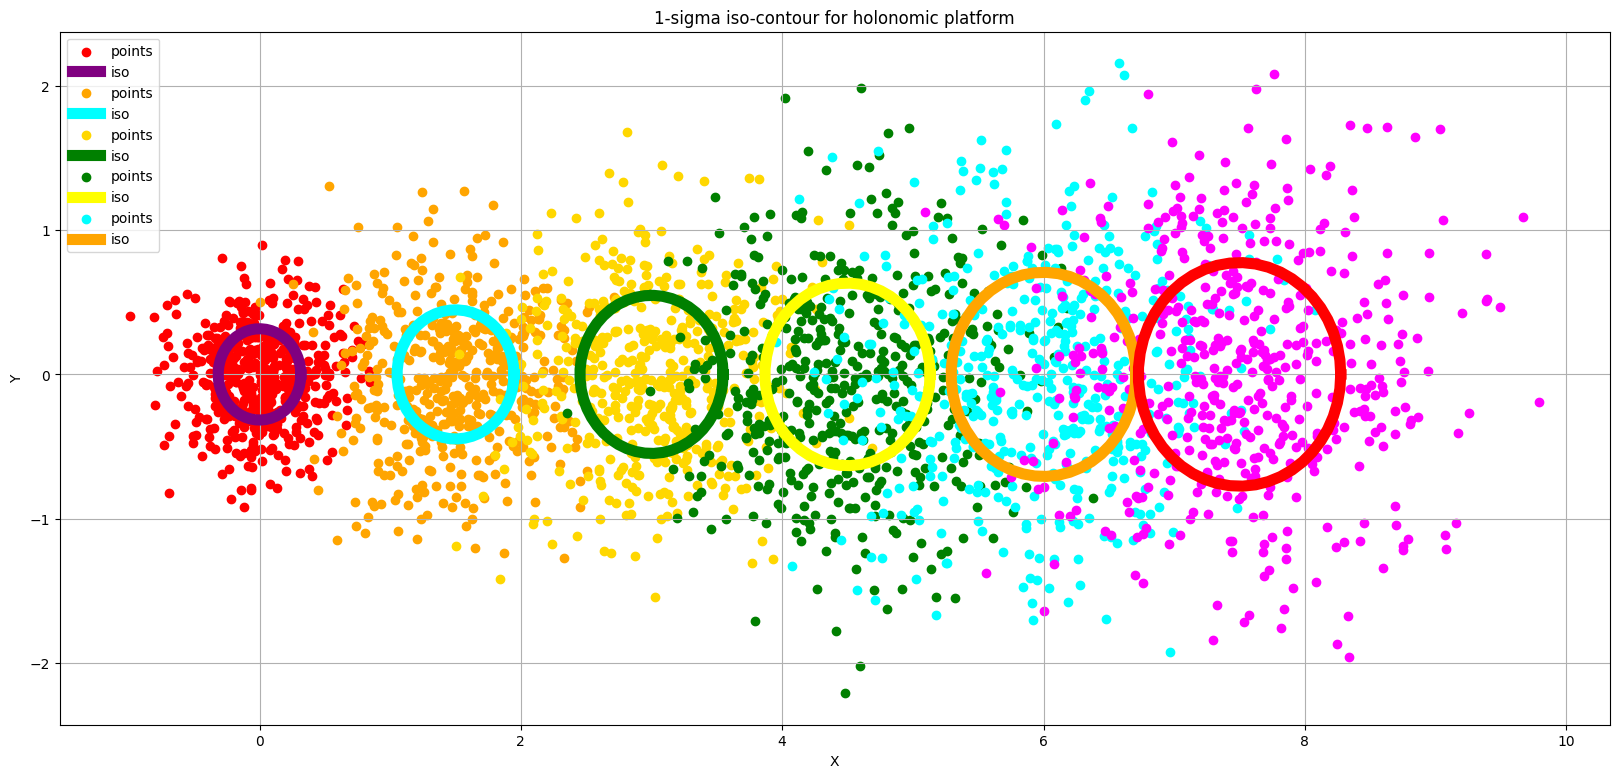

In [237]:
colors =['red','orange', 'gold', 'green', 'cyan', 'magenta']
colors_iso = ['purple', 'cyan','green', 'yellow', 'orange', 'red']
mean_p, cov_p = propagation_holon(A, B, mean, cov, u)
plt.figure(figsize=[20, 9])
for i in range(6):
    graf = plot2dcov(mean_p[i], cov_p[i], 1)
    y = sample(mean_p[i], cov_p[i], 500)
    plt.scatter(y[:, 0], y[:, 1], color = colors[i], label = 'points')
    plt.plot(graf[0], graf[1], color =  colors_iso[i], linewidth= 8, label ='iso' )
plt.title('1-sigma iso-contour for holonomic platform')
plt.show()

**D.  Somehow, the platform is malfunctioning; thus, it is moving strangely and its propagation model has changed... Draw the propagation state PDF (1-sigma iso-contour and 500 particles) for times indexes t = 0, . . . , 5**

In [238]:
A_1 = np.array([[1, 0.3],
              [0, 1]])
mean_1 = np.array([0,0])
cov_1 = np.array([[0.1, 0], 
                  [0, 0.1]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


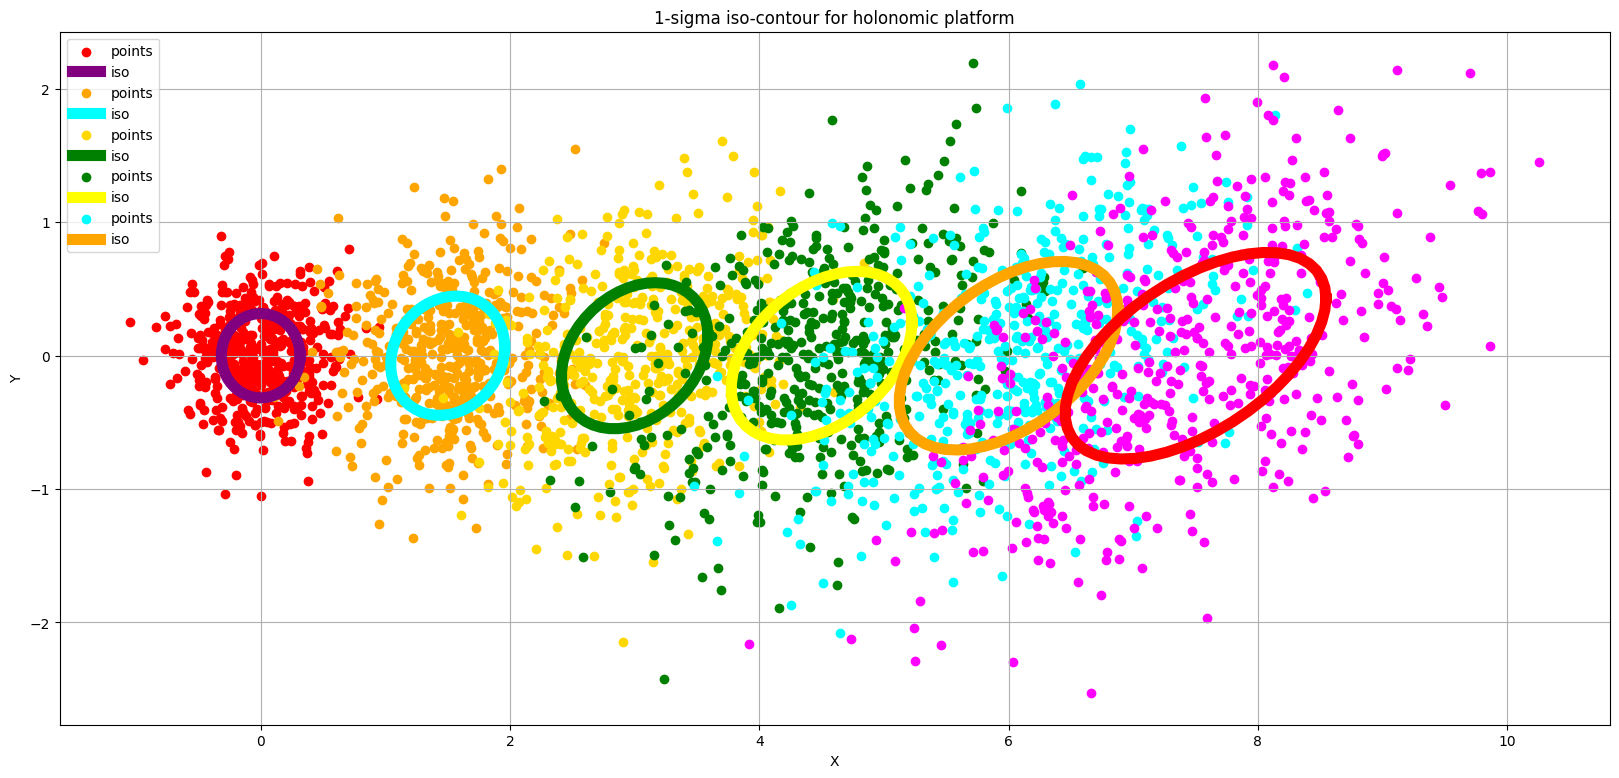

In [240]:

mean_p, cov_p = propagation_holon(A_1, B, mean_1, cov_1, u)
plt.figure(figsize=[20, 9])
for i in range(6):
    graf = plot2dcov(mean_p[i], cov_p[i], 1)
    y = sample(mean_p[i], cov_p[i], 500)
    plt.scatter(y[:, 0], y[:, 1], color = colors[i], label = 'points')
    plt.plot(graf[0], graf[1], color =  colors_iso[i], linewidth= 8, label ='iso' )
plt.title('1-sigma iso-contour for holonomic platform')
plt.show()

**E: Now, suppose that the robotic platform is non-holonomic, and the corresponding propagation model has changed. Propagate, as explained in class (linearize plus covariance propagation), for five time intervals, using the
control $u_t = [3, 1.5]^⊤$ showing the propagated Gaussian by plotting the 1-sigma iso-contour.**


**$x_{t-1}\sim N(\mu_{t-1}, \Sigma_{t-1}),$**

**$\varepsilon \sim N(0, R)$**


**$x_{t}\sim N(g(\mu_{t-1}, u_{t}), G_{t}\Sigma_{t-1}G_{t}^{T}+R)$**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


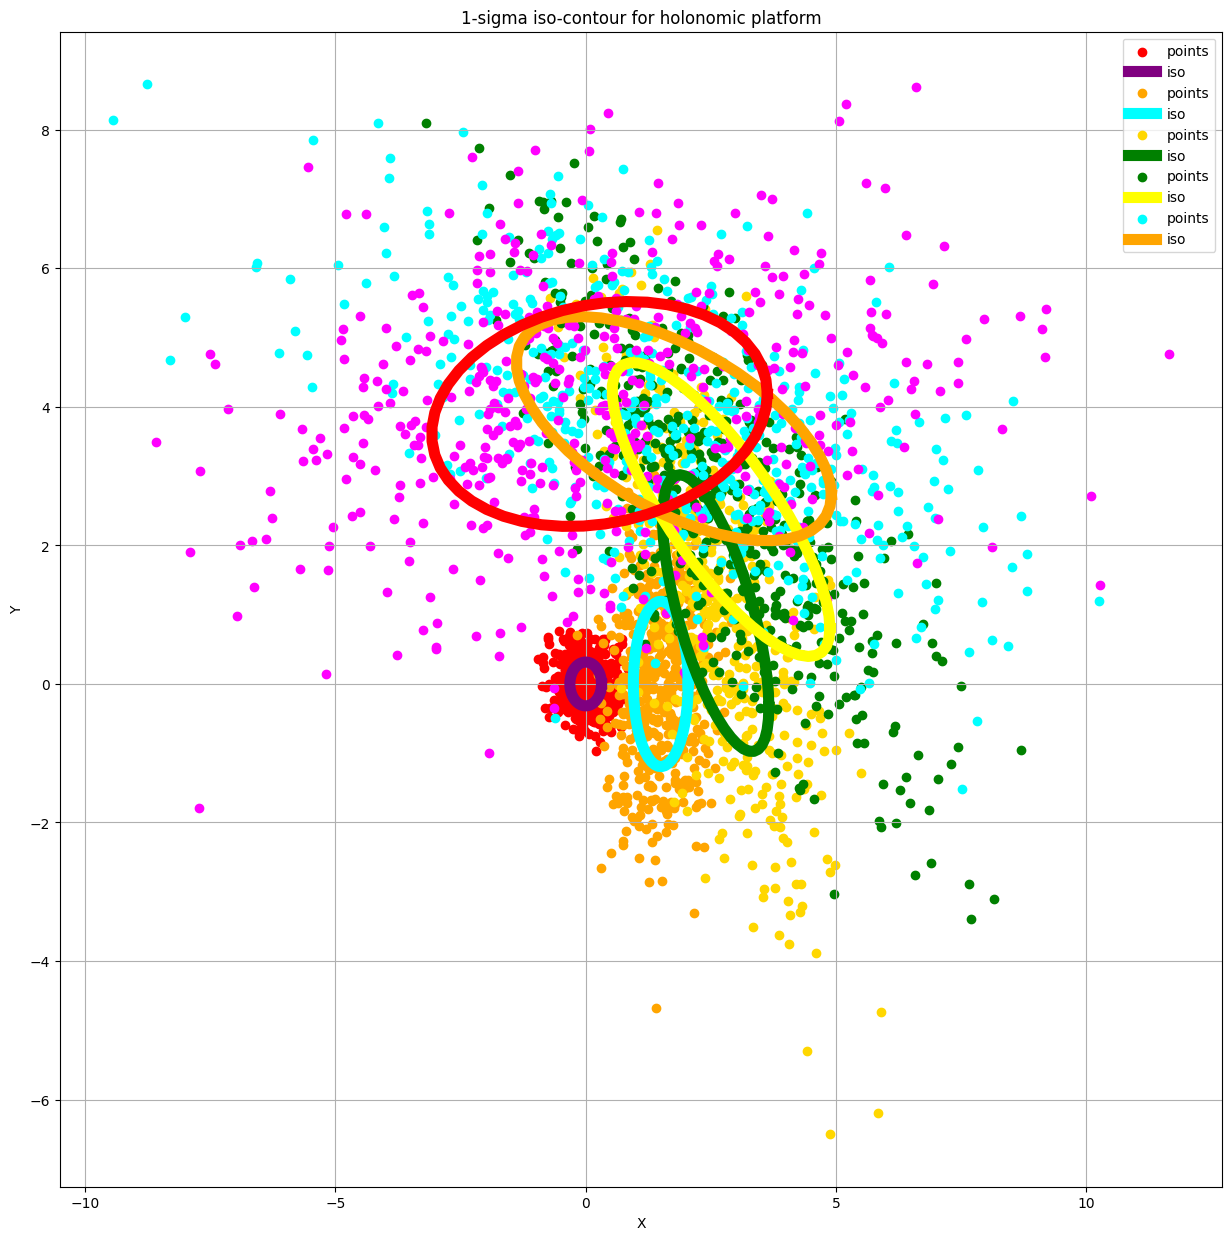

In [259]:
A = np.eye(3)
u = np.array([3, 1.5])
R = np.array([[0.2, 0, 0],
              [0, 0.2, 0],
              [0, 0, 0.1]])

mean = np.zeros(3)
cov = np.array([[0.1, 0, 0],
                [0, 0.1, 0],
                [0, 0, 0.5]])


plt.figure(figsize=[15, 15])
plt.title('1-sigma iso-contour for holonomic platform')  

for i in range(6):
    graf = plot2dcov(mean[:2], cov[:2, :2], 1)
    y = sample(mean[:2], cov[:2, :2], 500)
    
    t = mean[2]
    v = u[0]
    
    B = np.array([[0.5 * np.cos(t), 0],
                  [0.5 * np.sin(t), 0],
                  [0, 0.5]])
    
    G = np.array([[1, 0, - 0.5 * v * np.sin(t)],
                  [0, 1, 0.5 * v * np.cos(t)],
                  [ 0, 0, 1]])
    
    mean = A @ mean + B @ u
    cov = G @ cov @ G.T + R
    plt.scatter(y[:, 0], y[:, 1], color = colors[i], label = 'points')
    plt.plot(graf[0], graf[1], color =  colors_iso[i], linewidth= 8, label ='iso' )
    
  
    
    

**F:Repeat the same experiment as above, using the same control input ut and initial state estimate, now considering that noise is expressed in the action space instead of state space.**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


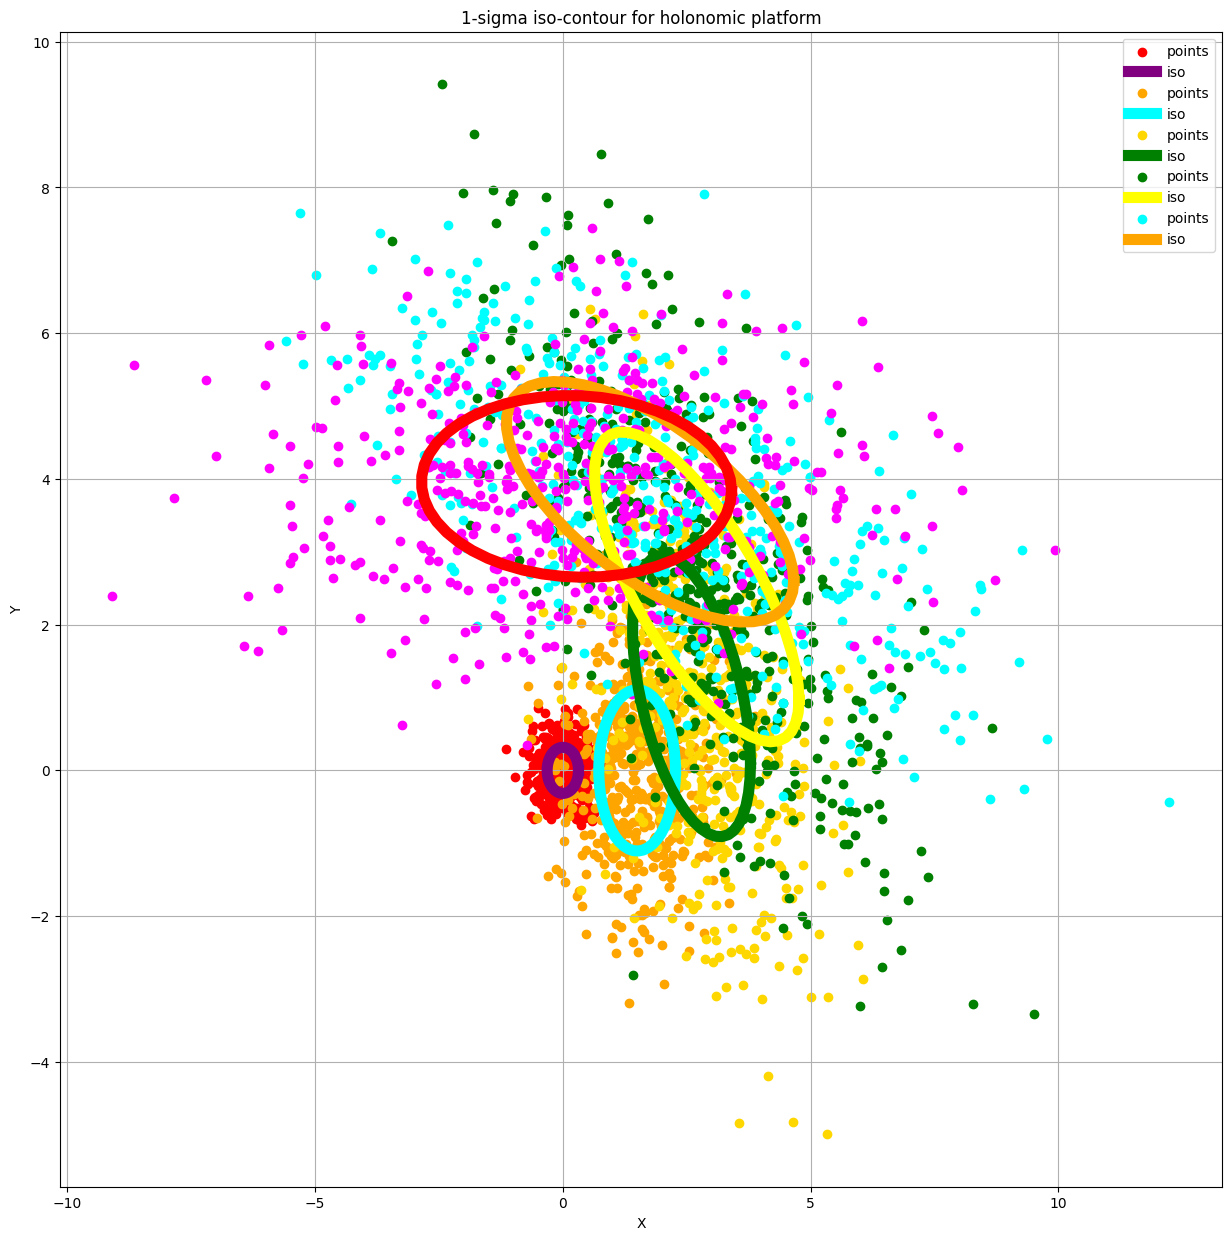

In [262]:
A = np.eye(3)
u = np.array([3, 1.5])
R = np.array([[2, 0], [0, 0.1]])

mean = np.zeros(3)
cov = np.array([[0.1, 0, 0],
                [0, 0.1, 0],
                [0, 0, 0.5]])


plt.figure(figsize=[15, 15])
plt.title('1-sigma iso-contour for holonomic platform')  

for i in range(6):
    graf = plot2dcov(mean[:2], cov[:2, :2], 1)
    y = sample(mean[:2], cov[:2, :2], 500)
    
    t = mean[2]
    v = u[0]
    
    B = np.array([[0.5 * np.cos(t), 0],
                  [0.5 * np.sin(t), 0],
                  [0, 0.5]])
    
    G = np.array([[1, 0, - 0.5 * v * np.sin(t)],
                  [0, 1, 0.5 * v * np.cos(t)],
                  [ 0, 0, 1]])
    
    mean = A @ mean + B @ u
    cov = G @ cov @ G.T + (B @ R) @ B.T
    plt.scatter(y[:, 0], y[:, 1], color = colors[i], label = 'points')
    plt.plot(graf[0], graf[1], color =  colors_iso[i], linewidth= 8, label ='iso' )
    
  
    
    

**Conclusion: It can be observed that, from both equations for the resulting averages, the expected values of the centers are the same, and therefore, the noise effect can be disregarded when it comes to the average value in both cases. Therefore, we can see in the graph that there are larger and more deformed ellipses, which indicates that the noise is expressed in the action space rather than the state space.**